### Phase 4: Build machine learning models for forecast

In [1]:
# measure execution time
%load_ext autotime

time: 0 ns (started: 2023-06-22 02:12:50 +03:00)


In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

time: 4.2 s (started: 2023-06-22 02:12:50 +03:00)


### Load the dataset

In [3]:
# read dataset
time_series = pd.read_csv('C:/Users/SK/Desktop/Diploma_Thesis/Datasets/San-Francisco-Yellow-Cabs/Files/time_series.txt')

# drop unecessary columns
time_series.drop(["Traj ID","Taxi ID"],axis=1,inplace=True)

# print first two rows
time_series.head(2)

,Path,Length,"(Timestamp('2008-05-18 00:00:00'), Timestamp('2008-05-18 00:30:00'))","(Timestamp('2008-05-18 00:30:00'), Timestamp('2008-05-18 01:00:00'))","(Timestamp('2008-05-18 01:00:00'), Timestamp('2008-05-18 01:30:00'))","(Timestamp('2008-05-18 01:30:00'), Timestamp('2008-05-18 02:00:00'))","(Timestamp('2008-05-18 02:00:00'), Timestamp('2008-05-18 02:30:00'))","(Timestamp('2008-05-18 02:30:00'), Timestamp('2008-05-18 03:00:00'))","(Timestamp('2008-05-18 03:00:00'), Timestamp('2008-05-18 03:30:00'))","(Timestamp('2008-05-18 03:30:00'), Timestamp('2008-05-18 04:00:00'))",...,"(Timestamp('2008-05-24 19:00:00'), Timestamp('2008-05-24 19:30:00'))","(Timestamp('2008-05-24 19:30:00'), Timestamp('2008-05-24 20:00:00'))","(Timestamp('2008-05-24 20:00:00'), Timestamp('2008-05-24 20:30:00'))","(Timestamp('2008-05-24 20:30:00'), Timestamp('2008-05-24 21:00:00'))","(Timestamp('2008-05-24 21:00:00'), Timestamp('2008-05-24 21:30:00'))","(Timestamp('2008-05-24 21:30:00'), Timestamp('2008-05-24 22:00:00'))","(Timestamp('2008-05-24 22:00:00'), Timestamp('2008-05-24 22:30:00'))","(Timestamp('2008-05-24 22:30:00'), Timestamp('2008-05-24 23:00:00'))","(Timestamp('2008-05-24 23:00:00'), Timestamp('2008-05-24 23:30:00'))","(Timestamp('2008-05-24 23:30:00'), Timestamp('2008-05-25 00:00:00'))"
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1
1,"[776651709, 776651709]",2,4,9,7,7,5,16,6,13,...,3,12,1,4,5,6,0,4,4,4


time: 110 ms (started: 2023-06-22 02:12:54 +03:00)


In [4]:
# this list contains the column names
columns = ["Path","Length"]

# generate the columns of the dataset
i =2
while(True):
    if i == 2:
        columns.append(pd.to_datetime('2008-05-18 00:00:00'))
    else:
        columns.append(columns[i-1] + timedelta(seconds=1800))
    
    if (columns[i]>=pd.to_datetime('2008-05-24 23:59:59.000130')):
        break
    
    i+=1

# delete the last timestamp
columns.pop()

# assign new column names to our dataframe
time_series.columns = columns

# print first two rows
time_series.head(2)

,Path,Length,2008-05-18 00:00:00,2008-05-18 00:30:00,2008-05-18 01:00:00,2008-05-18 01:30:00,2008-05-18 02:00:00,2008-05-18 02:30:00,2008-05-18 03:00:00,2008-05-18 03:30:00,...,2008-05-24 19:00:00,2008-05-24 19:30:00,2008-05-24 20:00:00,2008-05-24 20:30:00,2008-05-24 21:00:00,2008-05-24 21:30:00,2008-05-24 22:00:00,2008-05-24 22:30:00,2008-05-24 23:00:00,2008-05-24 23:30:00
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1
1,"[776651709, 776651709]",2,4,9,7,7,5,16,6,13,...,3,12,1,4,5,6,0,4,4,4


time: 172 ms (started: 2023-06-22 02:12:54 +03:00)


### Transform the daraset

In [5]:
# reshape the data from column format to row format
id_cols = ['Path', 'Length']
time_cols = time_series.iloc[:,2:].columns
time_series = time_series.melt(id_vars=id_cols, value_vars=time_cols, var_name='Time Column', value_name='Traffic Flow')
time_series = time_series.set_index('Time Column')

# convert the index to datetime
time_series.index = pd.to_datetime(time_series.index)

# sort rows by Path and Time
time_series.sort_values(by=['Path'],inplace=True)

# print first rows of the dataset
time_series.head(5)

,Path,Length,Traffic Flow
Time Column,,,
2008-05-23 22:00:00,"[100400941, 100400941, 100400941, 100400941, 1...",8,6
2008-05-24 10:00:00,"[100400941, 100400941, 100400941, 100400941, 1...",8,3
2008-05-19 14:00:00,"[100400941, 100400941, 100400941, 100400941, 1...",8,6
2008-05-23 10:00:00,"[100400941, 100400941, 100400941, 100400941, 1...",8,3
2008-05-20 01:00:00,"[100400941, 100400941, 100400941, 100400941, 1...",8,15


time: 594 ms (started: 2023-06-22 02:12:55 +03:00)


### Convert the time series dataset to a supervised problem

In [6]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('Traffic Flow %d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('Traffic Flow %d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Traffic Flow %d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

data = pd.DataFrame()

for item in time_series['Path'].unique():
    x = series_to_supervised(time_series[time_series['Path'] == item].drop(['Length','Path'],axis=1), 16,1)
    x['Path'] = item
    x['Length'] = time_series[time_series['Path'] == item]['Length']
    
    data = pd.concat([data,x])

time: 1min 24s (started: 2023-06-22 02:13:08 +03:00)


In [7]:
# convert path column from categorical to numerical
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the 'Path' column
data['Path'] = label_encoder.fit_transform(data['Path'])

# sort the data based in Path column
data = data.sort_values(by=['Path'])

time: 703 ms (started: 2023-06-22 02:14:32 +03:00)


### Feature Creation From Time Information

In [8]:
# We define some features that might be usefull to our research
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['day'] = data.index.day
    df['hour'] = data.index.hour
    df['minute'] = data.index.minute
    return df

data = create_features(data)

time: 219 ms (started: 2023-06-22 02:14:33 +03:00)


### Train - Test split

In [9]:
# define train data
train = data.loc[data.index < '2008-05-24']
train.sort_index(inplace=True)

# define test data
test = data.loc[data.index >= '2008-05-24']
test.sort_index(inplace=True)

print("Train set shape: ",train.shape)
print("Test set shape: ",test.shape)

Train set shape:  (274326, 23)
Test set shape:  (45674, 23)
time: 235 ms (started: 2023-06-22 02:14:33 +03:00)


C:\Users\SK\AppData\Local\Temp\ipykernel_11116\4177845814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.sort_index(inplace=True)
C:\Users\SK\AppData\Local\Temp\ipykernel_11116\4177845814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_index(inplace=True)


In [10]:
data

,Traffic Flow 1(t-16),Traffic Flow 1(t-15),Traffic Flow 1(t-14),Traffic Flow 1(t-13),Traffic Flow 1(t-12),Traffic Flow 1(t-11),Traffic Flow 1(t-10),Traffic Flow 1(t-9),Traffic Flow 1(t-8),Traffic Flow 1(t-7),...,Traffic Flow 1(t-3),Traffic Flow 1(t-2),Traffic Flow 1(t-1),Traffic Flow 1(t),Path,Length,hour,dayofweek,day,minute
Time Column,,,,,,,,,,,,,,,,,,,,,
2008-05-23 17:00:00,6.0,3.0,6.0,3.0,15.0,12.0,2.0,8.0,7.0,2.0,...,8.0,1.0,3.0,7,0,8,17,4,23,0
2008-05-20 08:00:00,22.0,3.0,1.0,6.0,13.0,2.0,10.0,9.0,6.0,10.0,...,10.0,12.0,2.0,1,0,8,8,1,20,0
2008-05-23 12:00:00,3.0,22.0,3.0,1.0,6.0,13.0,2.0,10.0,9.0,6.0,...,17.0,10.0,12.0,2,0,8,12,4,23,0
2008-05-19 19:30:00,0.0,3.0,22.0,3.0,1.0,6.0,13.0,2.0,10.0,9.0,...,15.0,17.0,10.0,12,0,8,19,0,19,30
2008-05-18 04:00:00,7.0,0.0,3.0,22.0,3.0,1.0,6.0,13.0,2.0,10.0,...,10.0,15.0,17.0,10,0,8,4,6,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-05-22 17:00:00,1.0,5.0,4.0,7.0,4.0,0.0,1.0,0.0,3.0,1.0,...,0.0,3.0,0.0,0,999,4,17,3,22,0
2008-05-22 11:30:00,2.0,1.0,5.0,4.0,7.0,4.0,0.0,1.0,0.0,3.0,...,2.0,0.0,3.0,0,999,4,11,3,22,30
2008-05-24 23:00:00,0.0,2.0,1.0,5.0,4.0,7.0,4.0,0.0,1.0,0.0,...,1.0,2.0,0.0,3,999,4,23,5,24,0


time: 172 ms (started: 2023-06-22 02:14:34 +03:00)


### Define Features and Labels

In [13]:
# define features
features = ['Path', 'Length',
            'Traffic Flow 1(t-16)', 'Traffic Flow 1(t-15)','Traffic Flow 1(t-14)', 
            'Traffic Flow 1(t-13)','Traffic Flow 1(t-12)', 'Traffic Flow 1(t-11)',
            'Traffic Flow 1(t-10)', 'Traffic Flow 1(t-9)','Traffic Flow 1(t-8)', 
            'Traffic Flow 1(t-7)','Traffic Flow 1(t-6)', 'Traffic Flow 1(t-5)', 
            'Traffic Flow 1(t-4)','Traffic Flow 1(t-3)', 'Traffic Flow 1(t-2)', 
            'Traffic Flow 1(t-1)',
            'hour', 'dayofweek', 'day', 'minute']

# define labels
labels = ['Traffic Flow 1(t)']

# create train set
X_train = train[features]
y_train = train[labels]

# create test set
X_test = test[features]
y_test = test[labels]

time: 47 ms (started: 2023-06-22 02:15:27 +03:00)


### Train an XGboost model

In [14]:
import xgboost as xgb

time: 203 ms (started: 2023-06-22 02:15:30 +03:00)


In [29]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train, weight=np.ones(len(X_train)))  # Initialize weights with ones
dtest = xgb.DMatrix(X_test, label=y_test)

# Define feature weights
feature_weights = np.ones(len(features))  # Initialize with equal weights
path_index = features.index('Path')
length_index = features.index('Length')
feature_weights[path_index] = 2.0  # Assign higher weight to 'Path'
feature_weights[length_index] = 2.0  # Assign higher weight to 'Length'

# Set feature weights in DMatrix
dtrain.set_weight(feature_weights)

time: 328 ms (started: 2023-06-22 02:24:18 +03:00)


In [30]:
# Define XGBoost regressor
reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=5000,
    early_stopping_rounds=10,
    learning_rate=0.01,
    max_depth=3,
    colsample_bytree=0.9,
    gamma=0.3
)

# Train the XGBoost model with feature weights
reg.fit(X_train, y_train, sample_weight=feature_weights, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

XGBoostError: [02:24:19] C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\data\data.cc:701: Check failed: weights_.Size() == num_row_ (22 vs. 274326) : Size of weights must equal to number of rows.

time: 813 ms (started: 2023-06-22 02:24:18 +03:00)


### Feature Importance

<Figure size 1080x360 with 0 Axes>

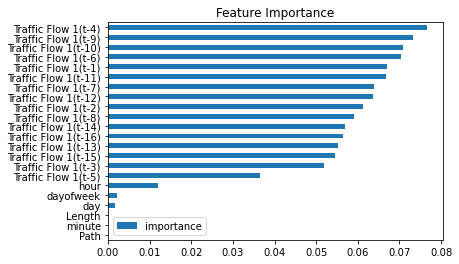

time: 562 ms (started: 2023-06-22 02:16:30 +03:00)


In [16]:
# Show how much each of the features was used in our regression analysis
plt.figure(figsize=(15,5))
fi = pd.DataFrame(data=reg.feature_importances_,index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecast on test set

In [17]:
# Timeseries forecating on test set
y_pred = reg.predict(X_test)

time: 172 ms (started: 2023-06-22 02:16:42 +03:00)


### Evaluate the results

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the MAE
print("Mae is: ",mean_absolute_error(y_test, y_pred))

# Calculate RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE score:", rmse)

Mae is:  2.2519212490476286
RMSE score: 3.6704975216991422
time: 16 ms (started: 2023-06-22 02:16:45 +03:00)


In [19]:
y_test['pred'] = y_pred

time: 0 ns (started: 2023-06-22 02:16:50 +03:00)


C:\Users\SK\AppData\Local\Temp\ipykernel_11116\88617823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred


In [20]:
y_test

,Traffic Flow 1(t),pred
Time Column,,
2008-05-24 00:00:00,11,9.154056
2008-05-24 00:00:00,2,1.871687
2008-05-24 00:00:00,8,8.363477
2008-05-24 00:00:00,1,2.644077
2008-05-24 00:00:00,4,15.074407
...,...,...
2008-05-24 23:30:00,2,1.405269
2008-05-24 23:30:00,2,5.952371
2008-05-24 23:30:00,10,8.979999


time: 16 ms (started: 2023-06-22 02:16:53 +03:00)
